In [166]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from helpers.dynamic_model import filter_iteration
%load_ext autoreload
%autoreload 3
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [443]:
# pg23 = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/DSM-testing/pg23*', decode_times=False)
# prog = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/DSM-testing/prog*', decode_times=False)
# series = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/DSM-testing/series*', decode_times=False)
# static = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/DSM-testing/ocean_geometry.nc', decode_times=False).rename(
#     {'lath': 'yh', 'latq':'yq', 'lonh':'xh', 'lonq':'xq'})

In [591]:
import xgcm
grid = xgcm.Grid(static, coords={
            'X': {'center': 'xh', 'outer': 'xq'},
            'Y': {'center': 'yh', 'outer': 'yq'}},
            boundary={'X': 'fill', 'Y': 'fill'},
            fill_value = {'X': 0, 'Y': 0})
static['wet_u']=np.floor(grid.interp(static.wet,'X'))
static['wet_v']=np.floor(grid.interp(static.wet,'Y'))
static['wet_c']=np.floor(grid.interp(static.wet,['X','Y']))

In [605]:
pg23 = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/NeverWorld2/test-R4/pg23_00030004.nc', decode_times=False)
static = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/NeverWorld2/test-R4/ocean_geometry.nc', decode_times=False).rename(
     {'lath': 'yh', 'latq':'yq', 'lonh':'xh', 'lonq':'xq'})

In [606]:
uhSSM0 = pg23.GM_sfn_unlim_x.isel(zi=2) - pg23.GM_sfn_unlim_x.isel(zi=5)

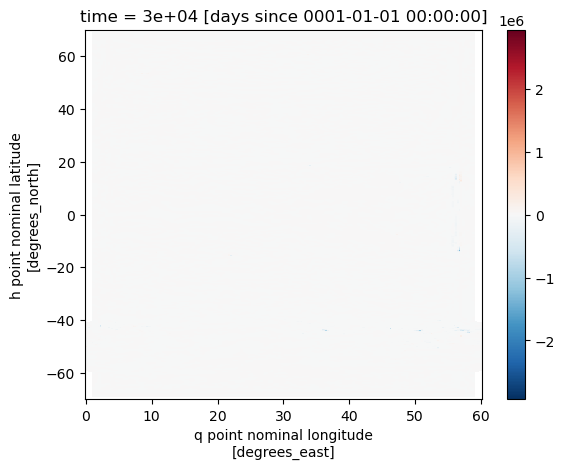

In [607]:
(uhSSM0 / grid.interp(pg23.SSM_h,'X') / static.dyCu).isel(zl=0).plot()

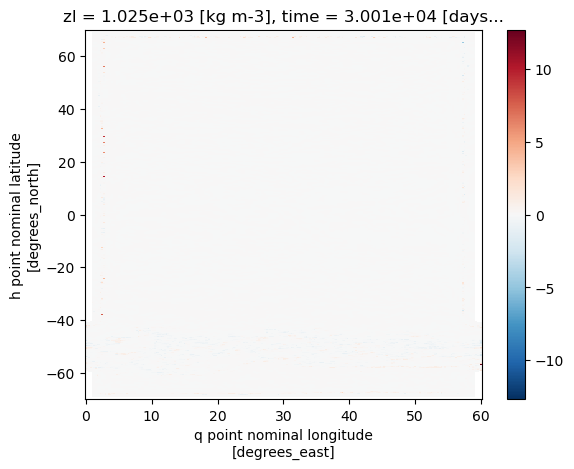

In [597]:
(pg23.uhSSM / grid.interp(pg23.SSM_h,'X') / static.dyCu).isel(zl=5).plot()

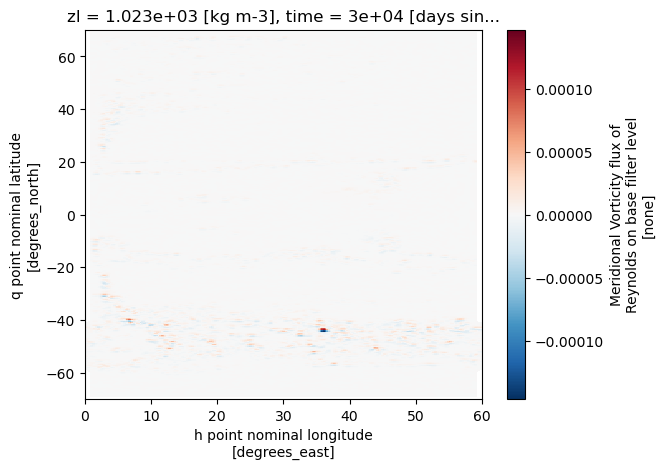

In [625]:
(pg23.bx_base).isel(zl=0).plot()

In [ ]:
pg23.

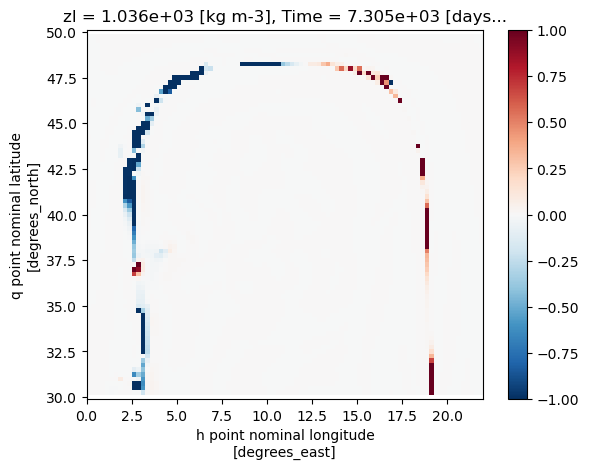

In [457]:
(pg23.vhSSM / grid.interp(pg23.SSM_h,'Y') / static.dxCv).isel(zl=-1).plot()

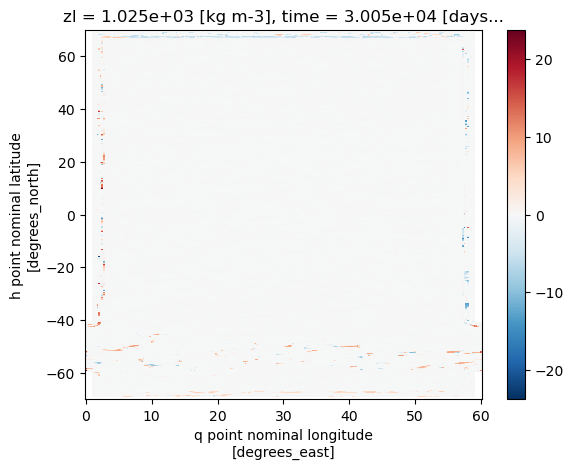

In [404]:
(pg23.uhSSM / grid.interp(pg23.h,'X') / static.dyCu).isel(time=-1,zl=-10).plot()

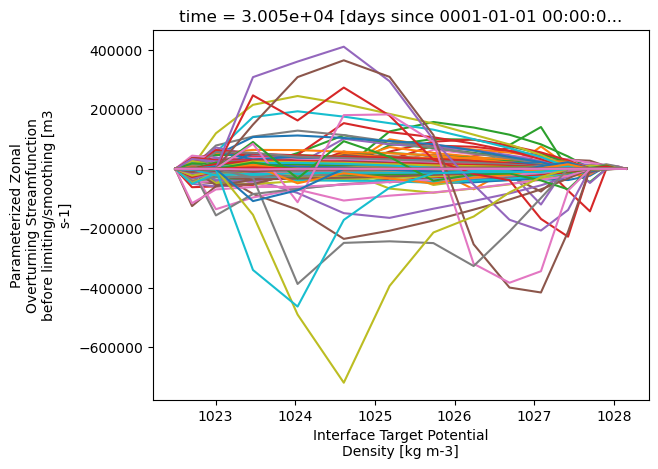

In [411]:
for yh in pg23.yh:
    pg23.GM_sfn_unlim_x.interp(xq=30,yh=yh).plot()

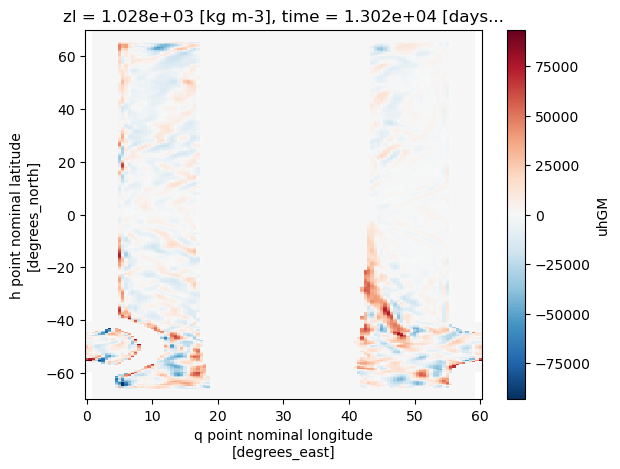

In [220]:
(pg23.uhGM*1e-3).isel(zl=-1,time=-1).plot()

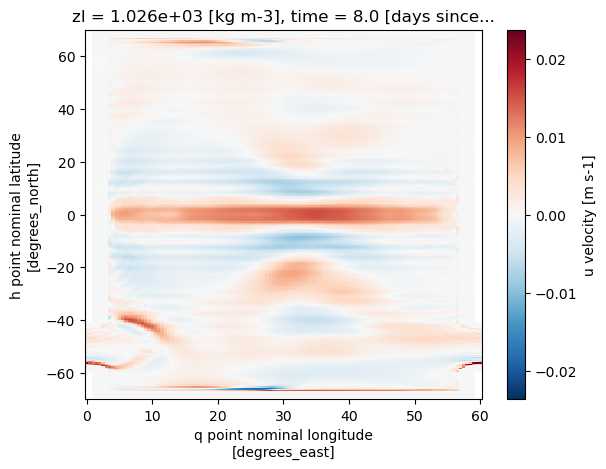

In [204]:
pg23.SSM_u.isel(zl=7,time=-1).plot()

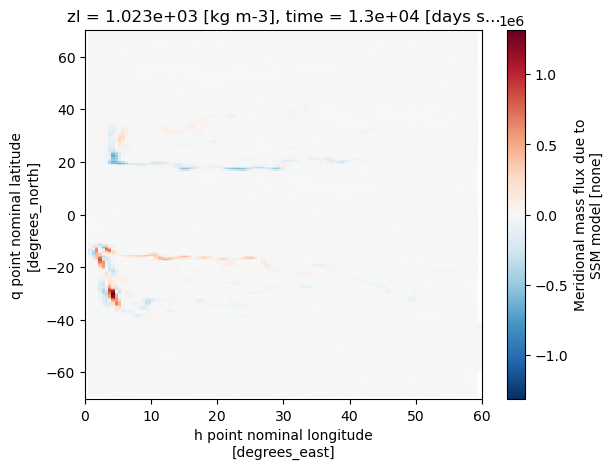

In [51]:
pg23.vhSSM.isel(zl=0).plot()

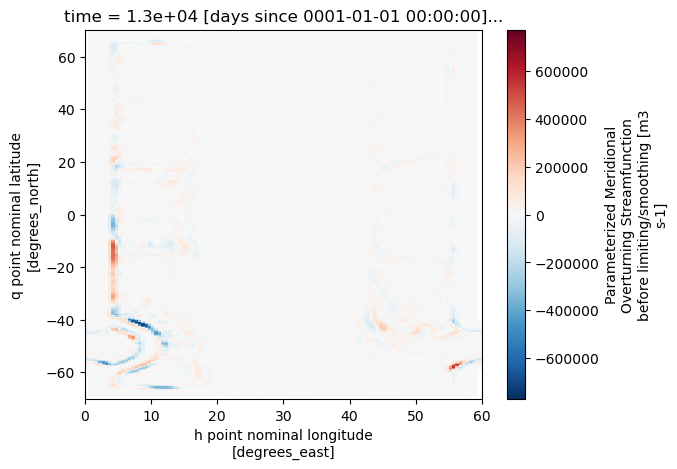

In [78]:
pg23.GM_sfn_unlim_y.isel(zi=-2).plot()

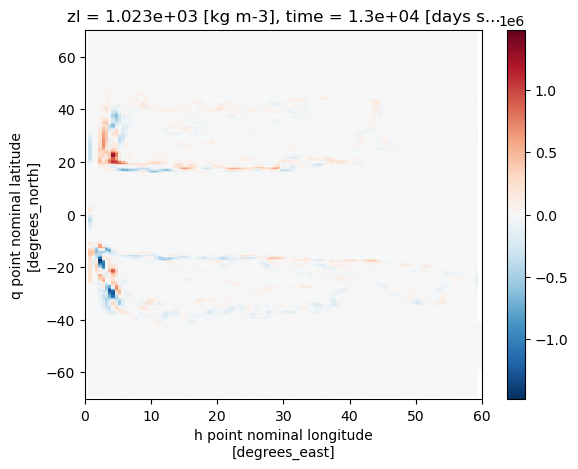

In [57]:
(pg23.vhSSM.isel(zl=1) + pg23.GM_sfn_unlim_y.isel(zi=1)).plot()

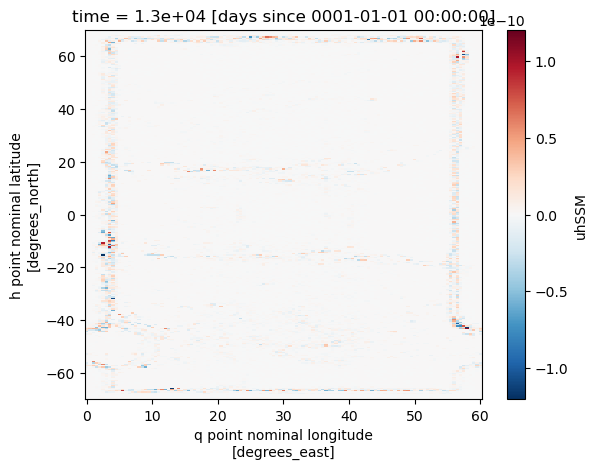

In [59]:
pg23.uhSSM.sum('zl').plot()

In [347]:
u, v, h = pg23.SSM_u.fillna(0.), pg23.SSM_v.fillna(0.), pg23.SSM_h.fillna(0.)

uf = filter_iteration(u, static.wet_u, 'xq', 'yh', neumann=True, niter=1)
vf = filter_iteration(v, static.wet_v, 'xh', 'yq', neumann=True, niter=1)
hf = filter_iteration(h, static.wet, 'xh', 'yh', neumann=True, niter=1)

In [348]:
uhD = u * grid.interp(h, 'X')
vhD = v * grid.interp(h, 'Y')
uhD = filter_iteration(uhD, static.wet_u, 'xq', 'yh', neumann=True, niter=1)
vhD = filter_iteration(vhD, static.wet_v, 'xh', 'yq', neumann=True, niter=1)
uhD = uhD - uf * grid.interp(hf, 'X')
vhD = vhD - vf * grid.interp(hf, 'Y')
uhD = uhD * static.wet_u# * static.dyCu
vhD = vhD * static.wet_v# * static.dxCv

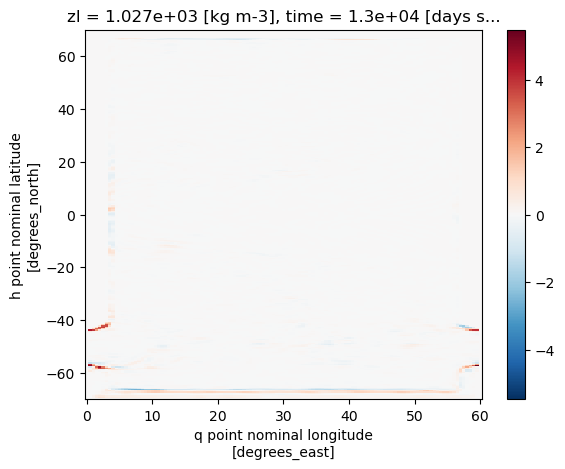

In [367]:
(uhD).isel(zl=-6,time=-1).plot()

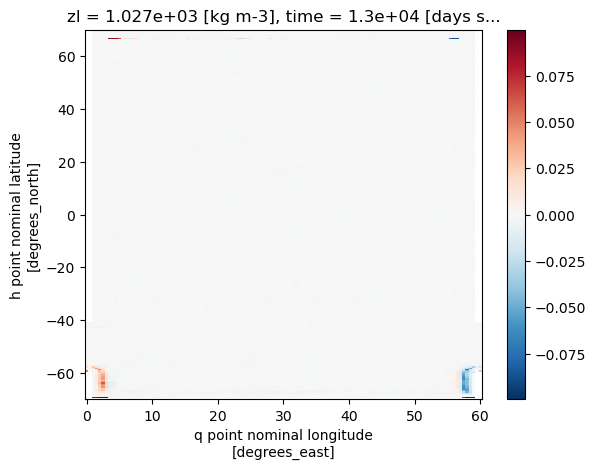

In [365]:
(pg23.uhGM*1e-3 / static.dyCu / grid.interp(h,'X')).isel(zl=-6,time=-1).plot()

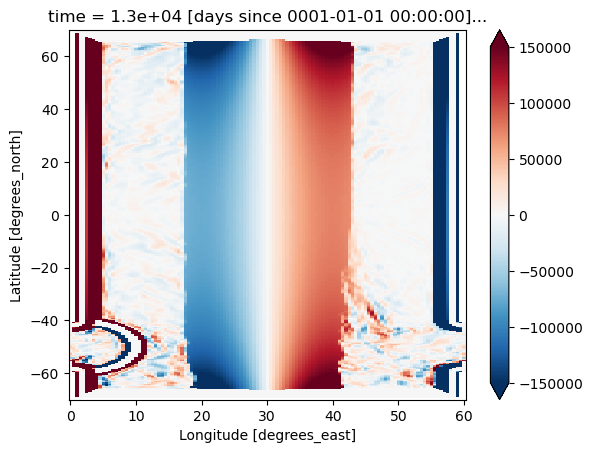

In [260]:
(static.dyCu * 1000. * pg23.slope_x).isel(zi=-2,time=-1).plot(vmax=150000)

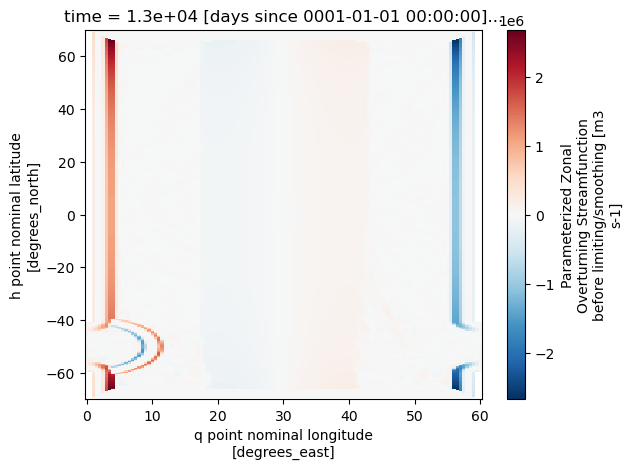

In [256]:
(pg23.GM_sfn_unlim_x.isel(zi=-2)).plot()

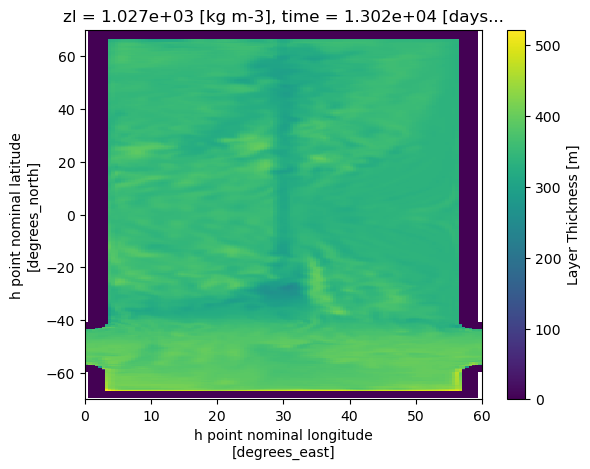

In [236]:
pg23.h.isel(zl=-5,time=-1).plot()

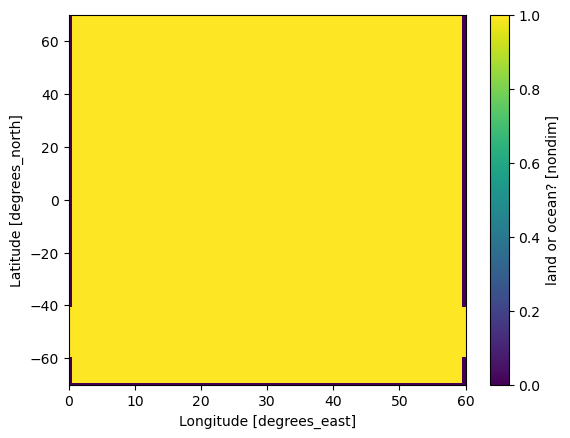

In [178]:
static.wet.plot()

In [369]:
hu = grid.interp(h,'X')
uhD = (hu.isel(zl=1) * uhD.isel(zl=0) - hu.isel(zl=0) * uhD.isel(zl=1)) / hu.sum('zl')

In [370]:
hv = grid.interp(h,'Y')
vhD = (hv.isel(zl=1) * vhD.isel(zl=0) - hv.isel(zl=0) * vhD.isel(zl=1)) / hv.sum('zl')

Text(0.5, 1.0, '')

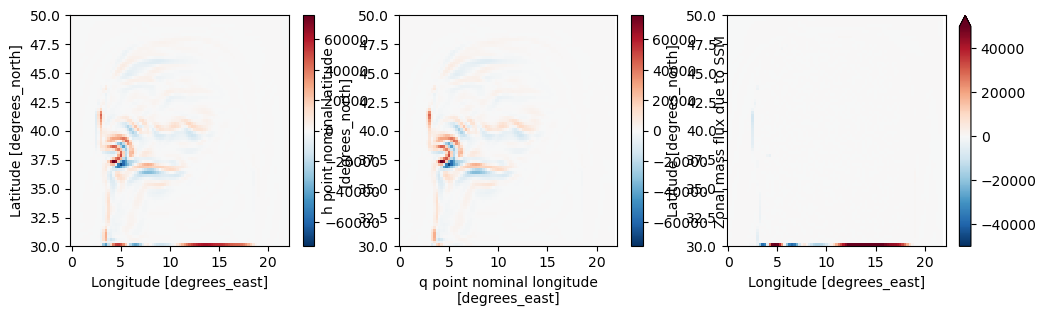

In [371]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
(uhD).plot()
plt.title('')
plt.subplot(1,3,2)
((pg23.uhSSM)).isel(zl=0).plot()
plt.title('')
plt.subplot(1,3,3)
(uhD-pg23.uhSSM.isel(zl=0)).plot(vmax=50000)
plt.title('')

Text(0.5, 1.0, '')

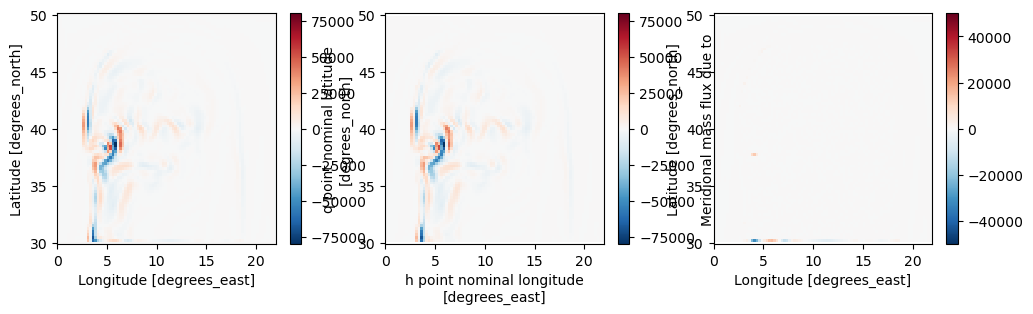

In [372]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
(vhD).plot()
plt.title('')
plt.subplot(1,3,2)
((pg23.vhSSM)).isel(zl=0).plot()
plt.title('')
plt.subplot(1,3,3)
(vhD-pg23.vhSSM.isel(zl=0)).plot(vmax=50000)
plt.title('')

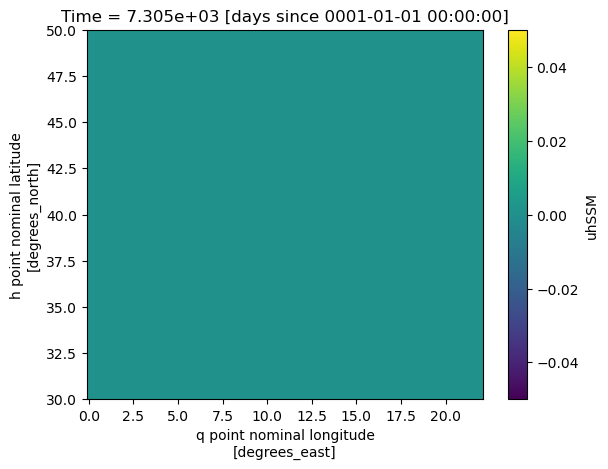

In [373]:
pg23.uhSSM.sum('zl').plot()

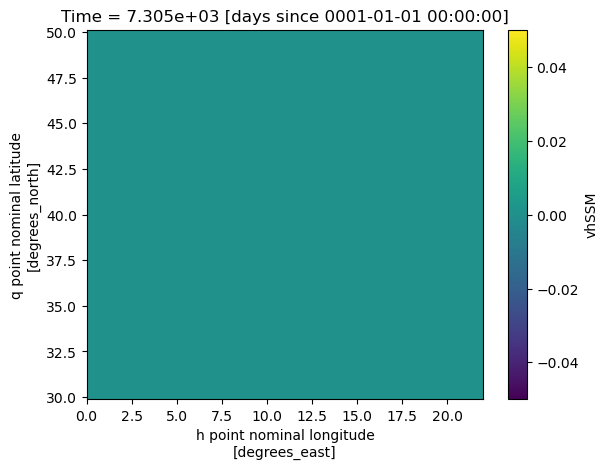

In [374]:
pg23.vhSSM.sum('zl').plot()

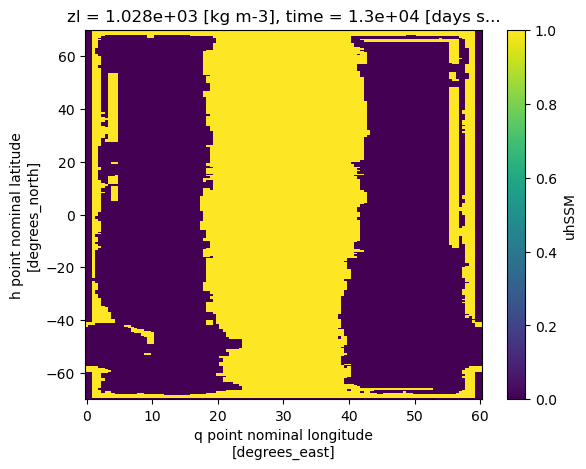

In [76]:
(np.abs(pg23.uhSSM.isel(zl=-1))<1e-5).plot()

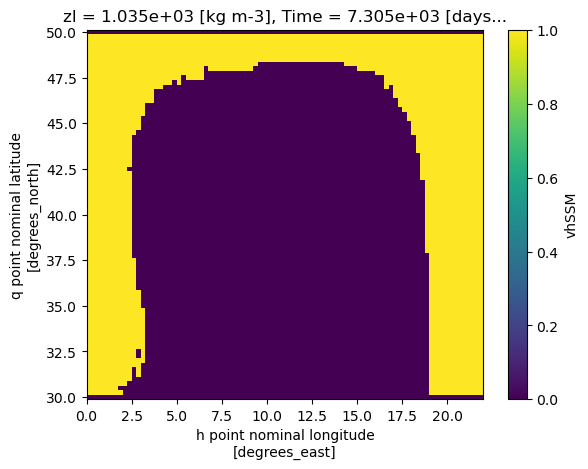

In [378]:
(np.abs(pg23.vhSSM.isel(zl=0))<1e-5).plot()

In [79]:
pg23.h.min().compute()

<xarray.DataArray 'h' ()>
array(1.e-10)

In [80]:
# mass was conserved
((pg23.SSM_h - pg23.h) * static.dxT * static.dyT).sum(['xh', 'yh']).compute() / ((pg23.SSM_h) * static.dxT * static.dyT).sum(['xh', 'yh']).compute()

<xarray.DataArray (time: 1, zl: 15)>
array([[-1.42220545e-18,  4.47997069e-19, -1.12671522e-18,
         2.67169780e-19, -2.13495673e-20,  4.42724392e-19,
        -3.55634267e-20,  4.82820849e-20, -1.27297951e-17,
        -9.42949851e-18, -9.36134288e-18, -4.39459283e-21,
        -8.53991741e-19,  8.32512019e-19, -1.84628170e-18]])
Coordinates:
  * zl       (zl) float64 1.023e+03 1.023e+03 1.023e+03 ... 1.028e+03 1.028e+03
  * time     (time) float64 1.3e+04

In [417]:
prog_ctrl = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/Feb2022/bare/R6-0.01/output/prog__0002_026.nc', decode_times=False)
prog = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/SSM-thickness/bare-0.01/R6/output/prog__0002_026.nc', decode_times=False)
cont = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/SSM-thickness/bare-0.01/R6/output/cont__0002_011.nc', decode_times=False)

prog_fun = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/SSM-streamfunction/bare-0.01/R6/prog__0002_026.nc', decode_times=False)
cont_fun = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/SSM-streamfunction/bare-0.01/R6/cont__0002_011.nc', decode_times=False)

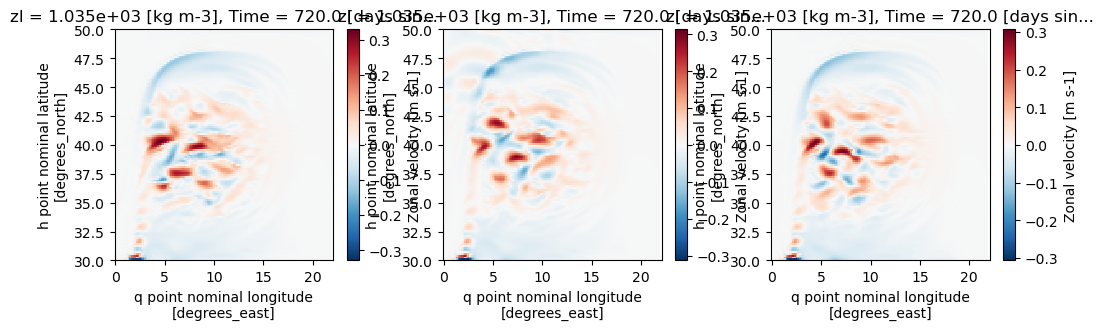

In [434]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
prog_ctrl.u.isel(Time=-1,zl=0).plot()

plt.subplot(1,3,2)
prog.u.isel(Time=-1,zl=0).plot()

plt.subplot(1,3,3)
prog_fun.u.isel(Time=-1,zl=0).plot()

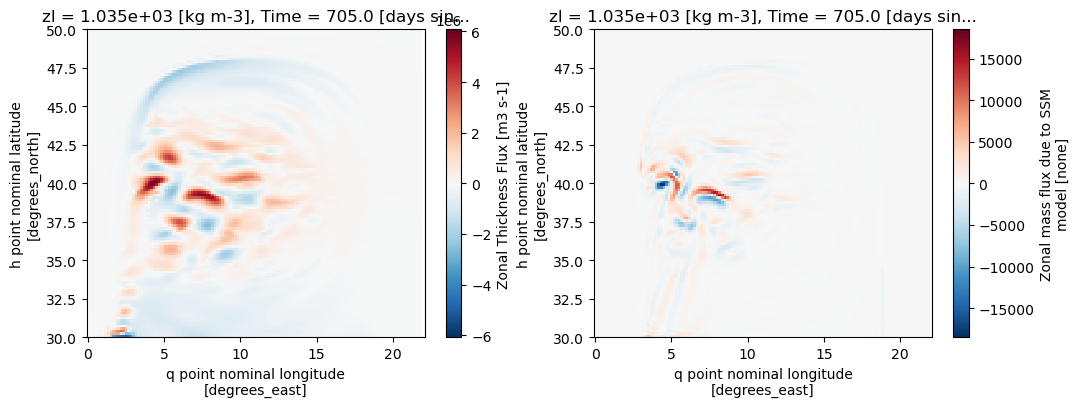

In [429]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
cont_fun.uh.isel(zl=0).isel(Time=-1).plot()
plt.subplot(1,2,2)
cont_fun.uhSSM.isel(zl=0).isel(Time=-1).plot()

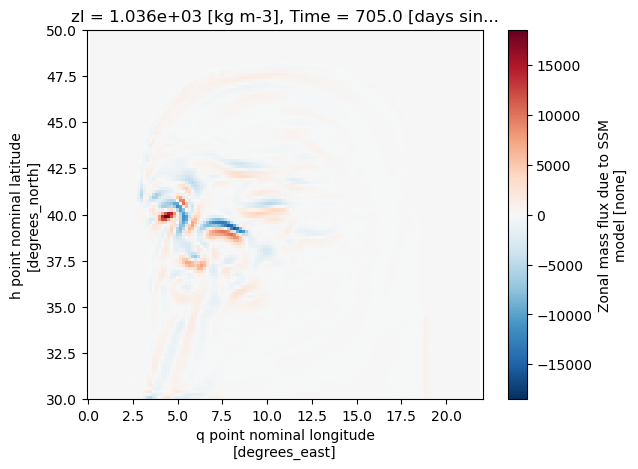

In [433]:
cont_fun.uhSSM.isel(zl=1,Time=-1).plot()

# Online experiments

In [2]:
from helpers.collection_of_experiments import *
from helpers.computational_tools import gaussian_remesh

In [190]:
ds = CollectionOfExperiments.init_folder('/home/ctrsp-2024/pp2681/experiments/Feb2022/bare', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/home/ctrsp-2024/pp2681/experiments/SSM-streamfunction', additional_subfolder='output', prefix='SSM-streamfunction')

In [191]:
ds += CollectionOfExperiments.init_folder('/home/ctrsp-2024/pp2681/experiments/SSM-thickness', additional_subfolder='output', prefix='SSM-thickness')

In [192]:
ds += CollectionOfExperiments.init_folder('/home/ctrsp-2024/pp2681/experiments/generalization-boundary10', additional_subfolder='output', prefix='boundary10')

In [193]:
for RR in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']:
    ds.remesh('R64', RR, operator=gaussian_remesh, FGR=np.sqrt(6), exp=f'R64_{RR}_FGR-sqrt6')

for RR in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']:
    for file in [f'/home/ctrsp-2024/pp2681/notebooks/filtered-data/R64_{RR}_FGR-sqrt6-part1-f32.nc', 
                 f'/home/ctrsp-2024/pp2681/notebooks/filtered-data/R64_{RR}_FGR-sqrt6-part2-f32.nc',
                 f'/home/ctrsp-2024/pp2681/notebooks/filtered-data/R64_{RR}_FGR-sqrt6-part3-f32.nc']:
            dataset = xr.open_dataset(file, decode_times=False, chunks={'Time':5})
            for key in dataset.keys():
                var = dataset[key]
                var['Time'] = ds['R64'].u['Time']
                setattr(ds[f'R64_{RR}_FGR-sqrt6'], key, var)

Experiment R64 coarsegrained to R2 is created. Its identificator=R64_R2_FGR-sqrt6
Experiment R64 coarsegrained to R3 is created. Its identificator=R64_R3_FGR-sqrt6
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4_FGR-sqrt6
Experiment R64 coarsegrained to R5 is created. Its identificator=R64_R5_FGR-sqrt6
Experiment R64 coarsegrained to R6 is created. Its identificator=R64_R6_FGR-sqrt6
Experiment R64 coarsegrained to R7 is created. Its identificator=R64_R7_FGR-sqrt6
Experiment R64 coarsegrained to R8 is created. Its identificator=R64_R8_FGR-sqrt6


In [32]:
ds.exps

['R32',
 'R8',
 'R64',
 'R2',
 'R4',
 'R16',
 'R3',
 'R5',
 'R6',
 'R7',
 'R2-0.01',
 'R2-0.03',
 'R3-0.01',
 'R3-0.03',
 'R4-0.01',
 'R4-0.03',
 'R5-0.01',
 'R5-0.03',
 'R6-0.01',
 'R6-0.03',
 'R7-0.01',
 'R7-0.03',
 'R8-0.01',
 'R8-0.03',
 'SSM-streamfunction-bare-0.01-R2',
 'SSM-streamfunction-bare-0.01-R3',
 'SSM-streamfunction-bare-0.01-R4',
 'SSM-streamfunction-bare-0.03-R2',
 'SSM-streamfunction-bare-0.03-R3',
 'SSM-streamfunction-bare-0.03-R4',
 'SSM-streamfunction-bare-0.06-R2',
 'SSM-streamfunction-bare-0.06-R3',
 'SSM-streamfunction-bare-0.06-R4',
 'R64_R2_FGR-sqrt6',
 'R64_R3_FGR-sqrt6',
 'R64_R4_FGR-sqrt6',
 'R64_R5_FGR-sqrt6',
 'R64_R6_FGR-sqrt6',
 'R64_R7_FGR-sqrt6',
 'R64_R8_FGR-sqrt6',
 'SSM-thickness-bare-0.01-R2',
 'SSM-thickness-bare-0.01-R3',
 'SSM-thickness-bare-0.01-R4',
 'SSM-thickness-bare-0.01-R5',
 'SSM-thickness-bare-0.01-R6',
 'SSM-thickness-bare-0.01-R7',
 'SSM-thickness-bare-0.01-R8',
 'SSM-thickness-bare-0.03-R2',
 'SSM-thickness-bare-0.03-R3',
 'SSM-thi

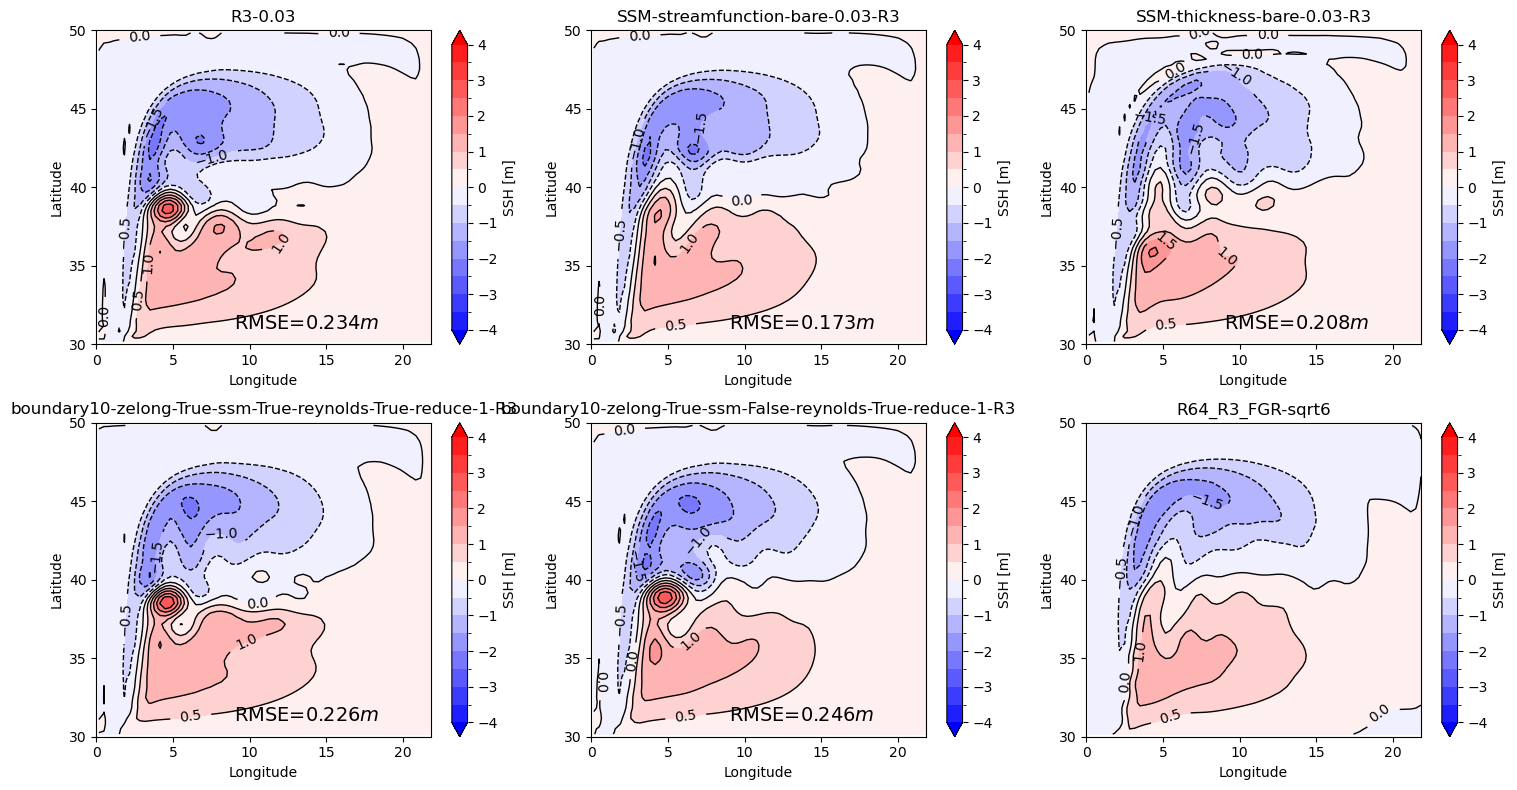

In [38]:
RR='R3'
Cs='0.03'
ds.plot_ssh([RR if Cs=='0.06' else f'{RR}-{Cs}',  f'SSM-streamfunction-bare-{Cs}-{RR}', f'SSM-thickness-bare-{Cs}-{RR}',
             'boundary10-zelong-True-ssm-True-reynolds-True-reduce-1-R3', 'boundary10-zelong-True-ssm-False-reynolds-True-reduce-1-R3',
             f'R64_{RR}_FGR-sqrt6'])

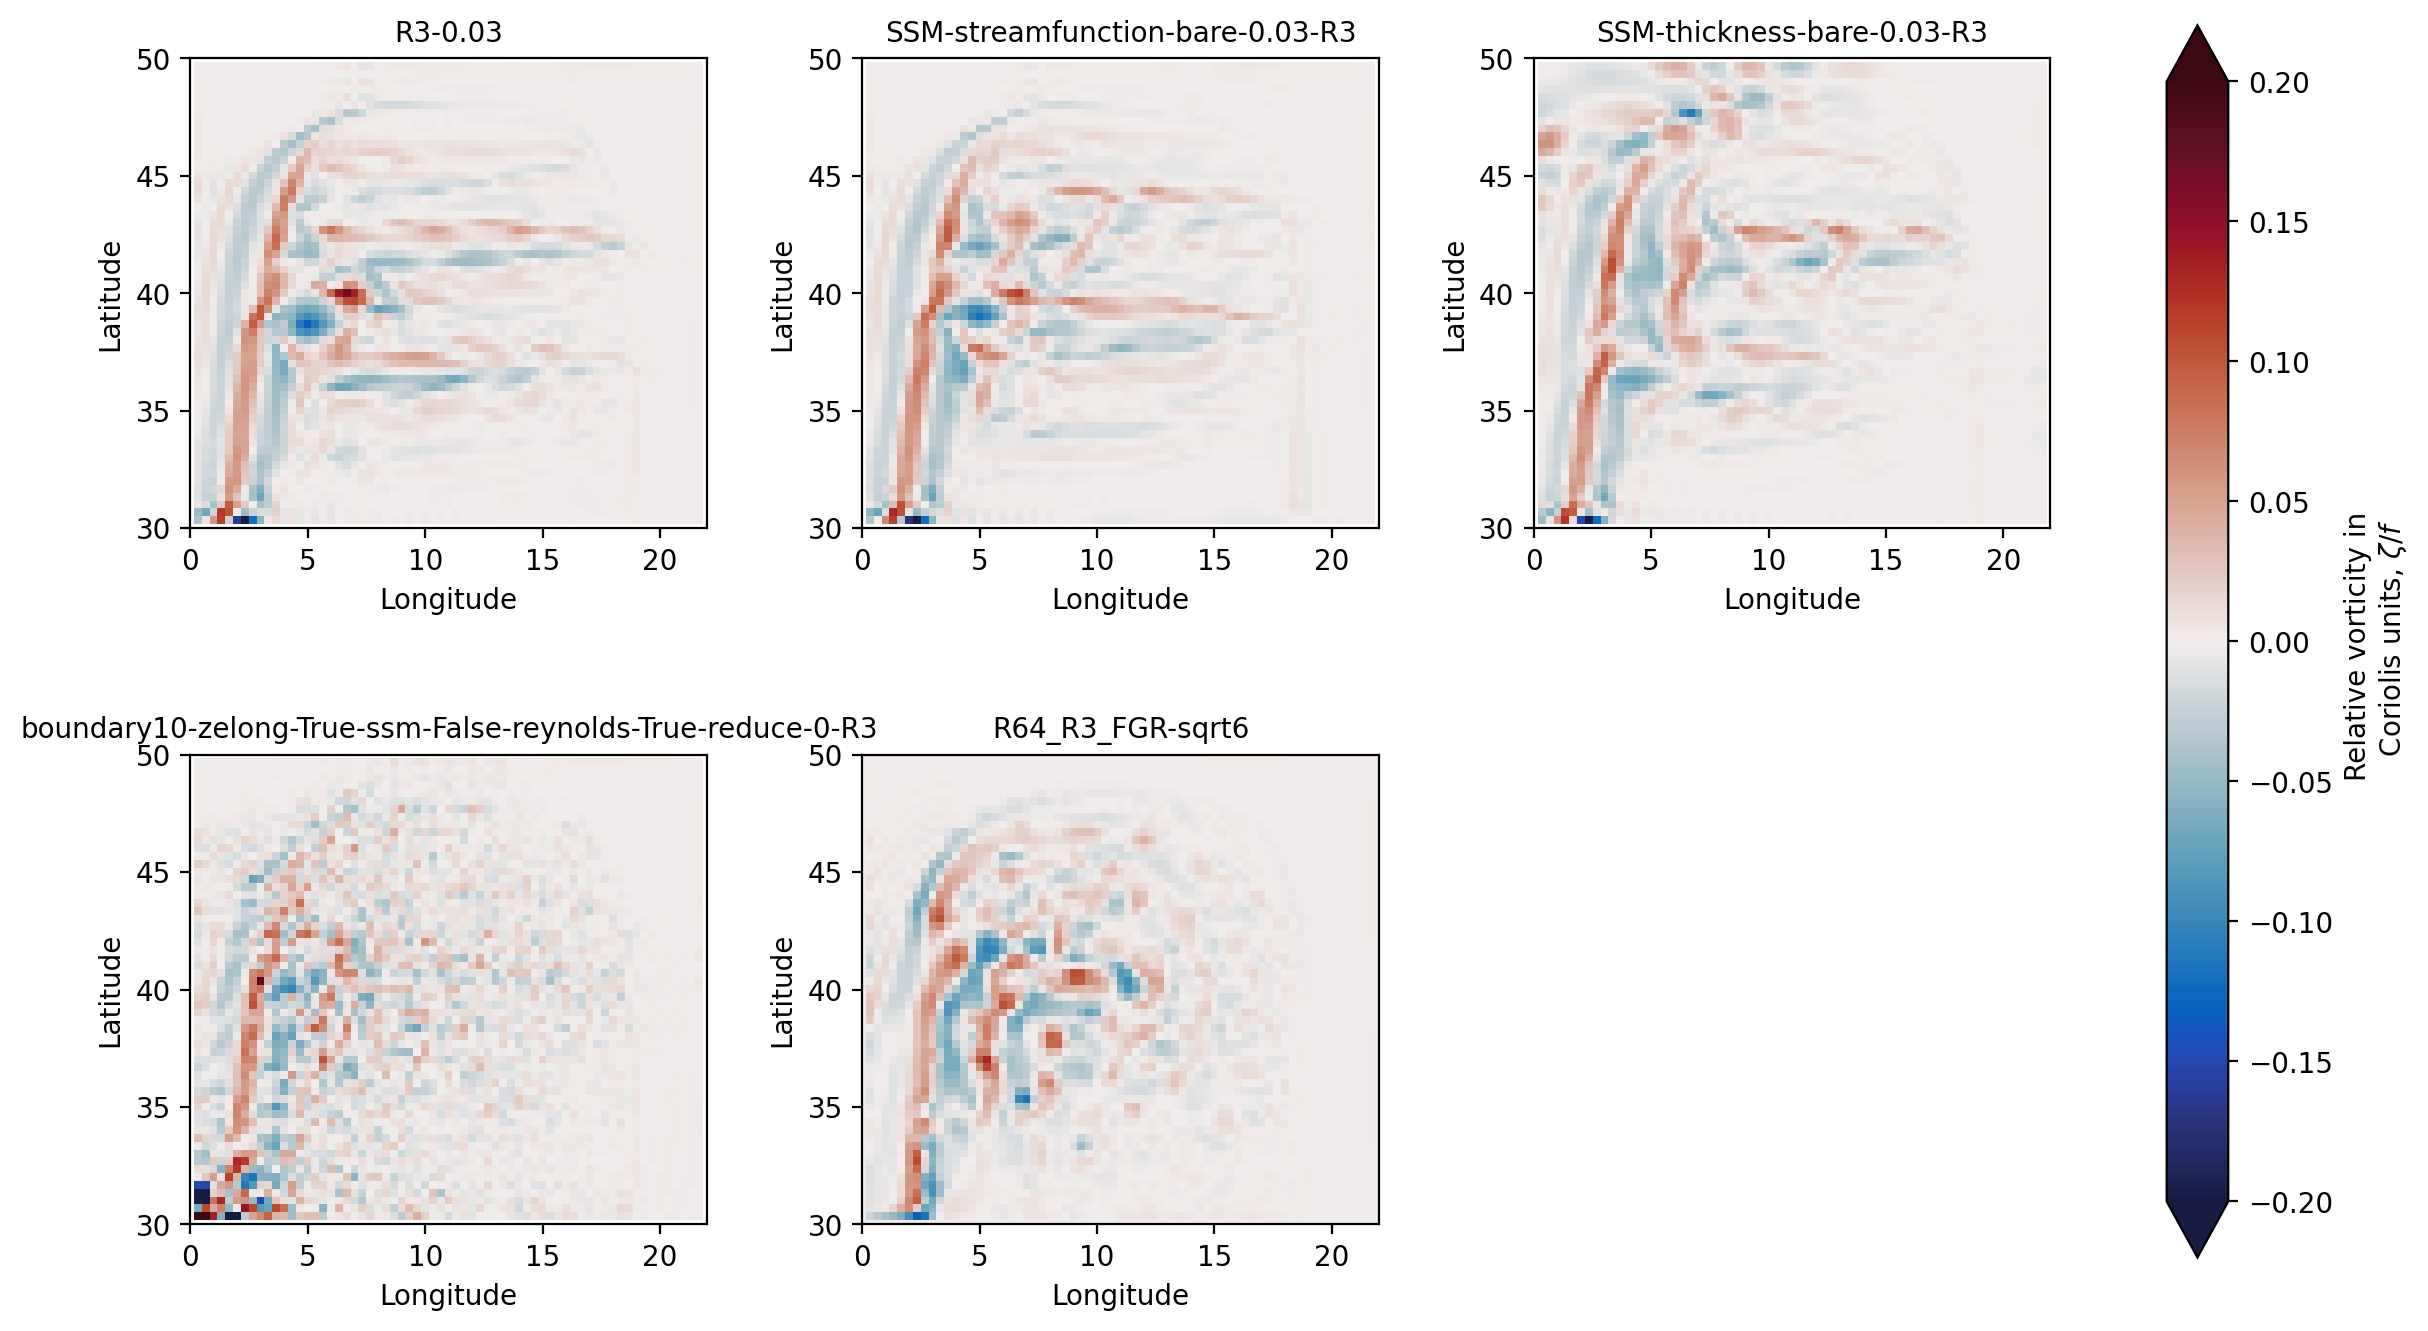

In [35]:
RR='R3'
Cs='0.03'
ds.plot_RV([RR if Cs=='0.06' else f'{RR}-{Cs}',  f'SSM-streamfunction-bare-{Cs}-{RR}', f'SSM-thickness-bare-{Cs}-{RR}',
             'boundary10-zelong-True-ssm-False-reynolds-True-reduce-0-R3',
             f'R64_{RR}_FGR-sqrt6'])

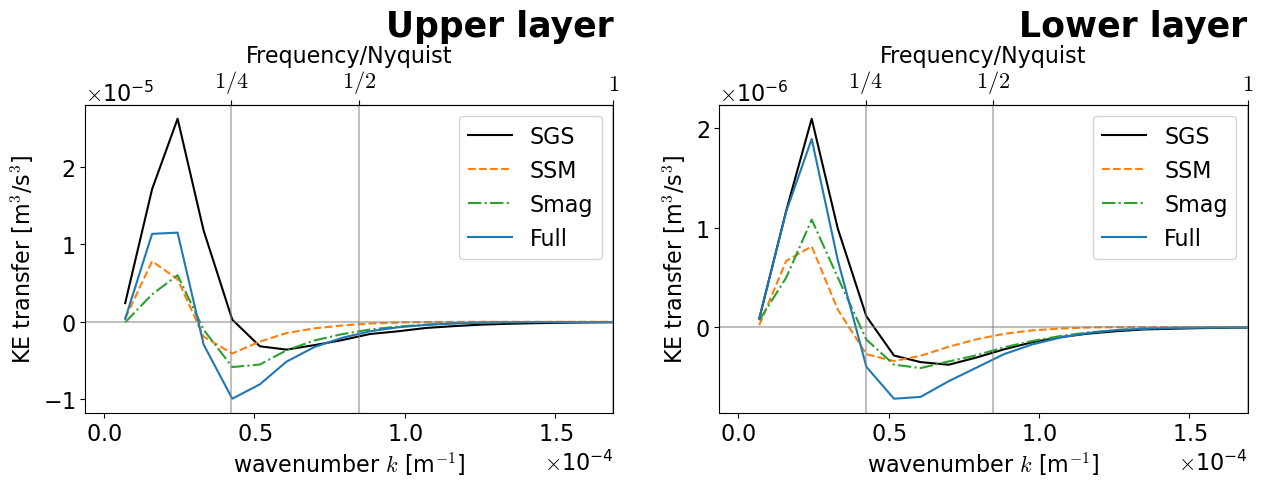

In [40]:
ds.plot_transfer('boundary10-zelong-True-ssm-False-reynolds-True-reduce-1-R6', target='R64_R6_FGR-sqrt6', callback=False)

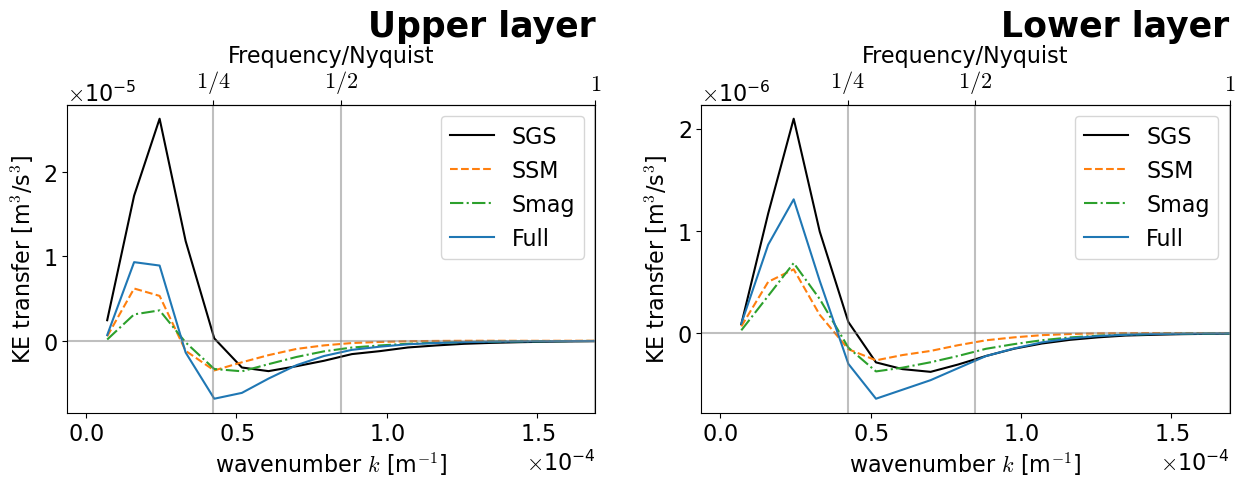

In [41]:
ds.plot_transfer('boundary10-zelong-True-ssm-True-reynolds-True-reduce-1-R6', target='R64_R6_FGR-sqrt6', callback=False)

In [126]:
exp = ds['boundary10-zelong-True-ssm-False-reynolds-True-reduce-0-R4']
rey_transfer = exp.transfer(exp.pg23.by_base, -exp.pg23.bx_base).compute()
rey_transfer = rey_transfer / rey_transfer.max('freq_r')
rey_transfer.isel(zl=0).plot()
rey_transfer.isel(zl=1).plot()

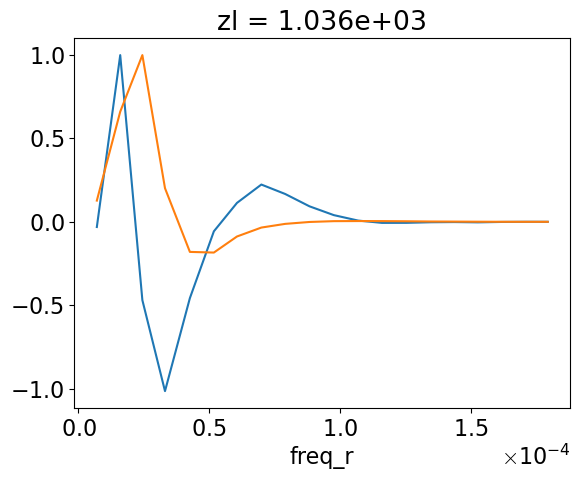

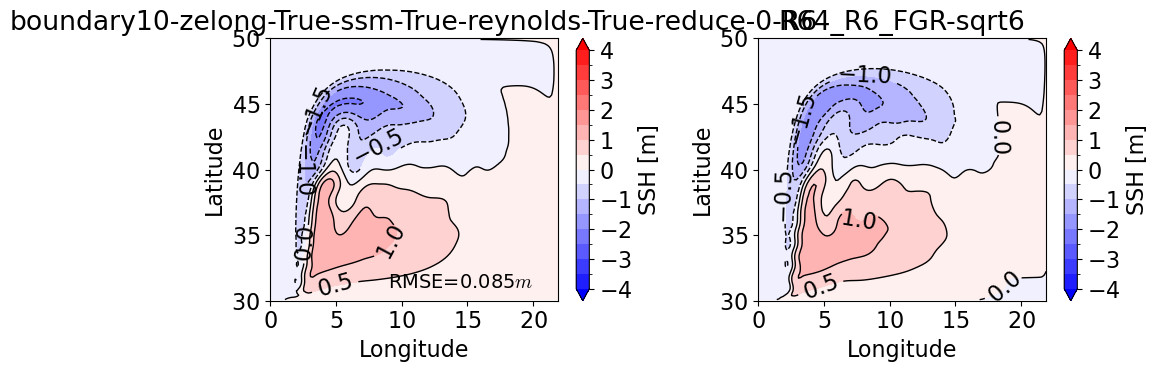

In [100]:
ds.plot_ssh(['boundary10-zelong-True-ssm-True-reynolds-True-reduce-0-R6', 'R64_R6_FGR-sqrt6'])

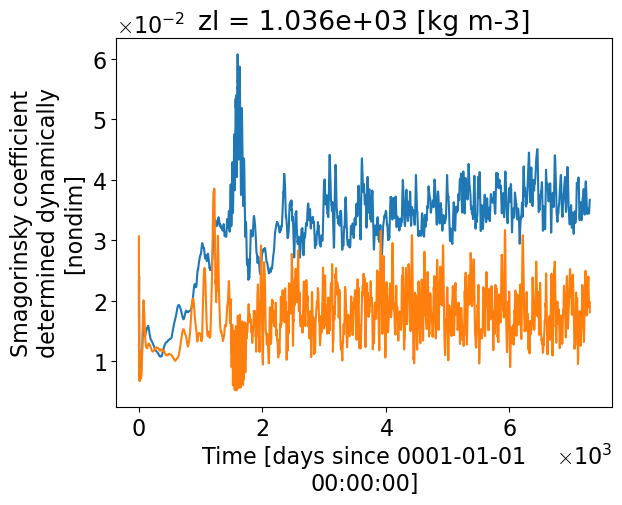

In [148]:
exp = ds['boundary10-zelong-True-ssm-True-reynolds-True-reduce-1-R2']
exp.series_diag.smag_const.isel(zl=0).plot()
exp.series_diag.smag_const.isel(zl=1).plot()

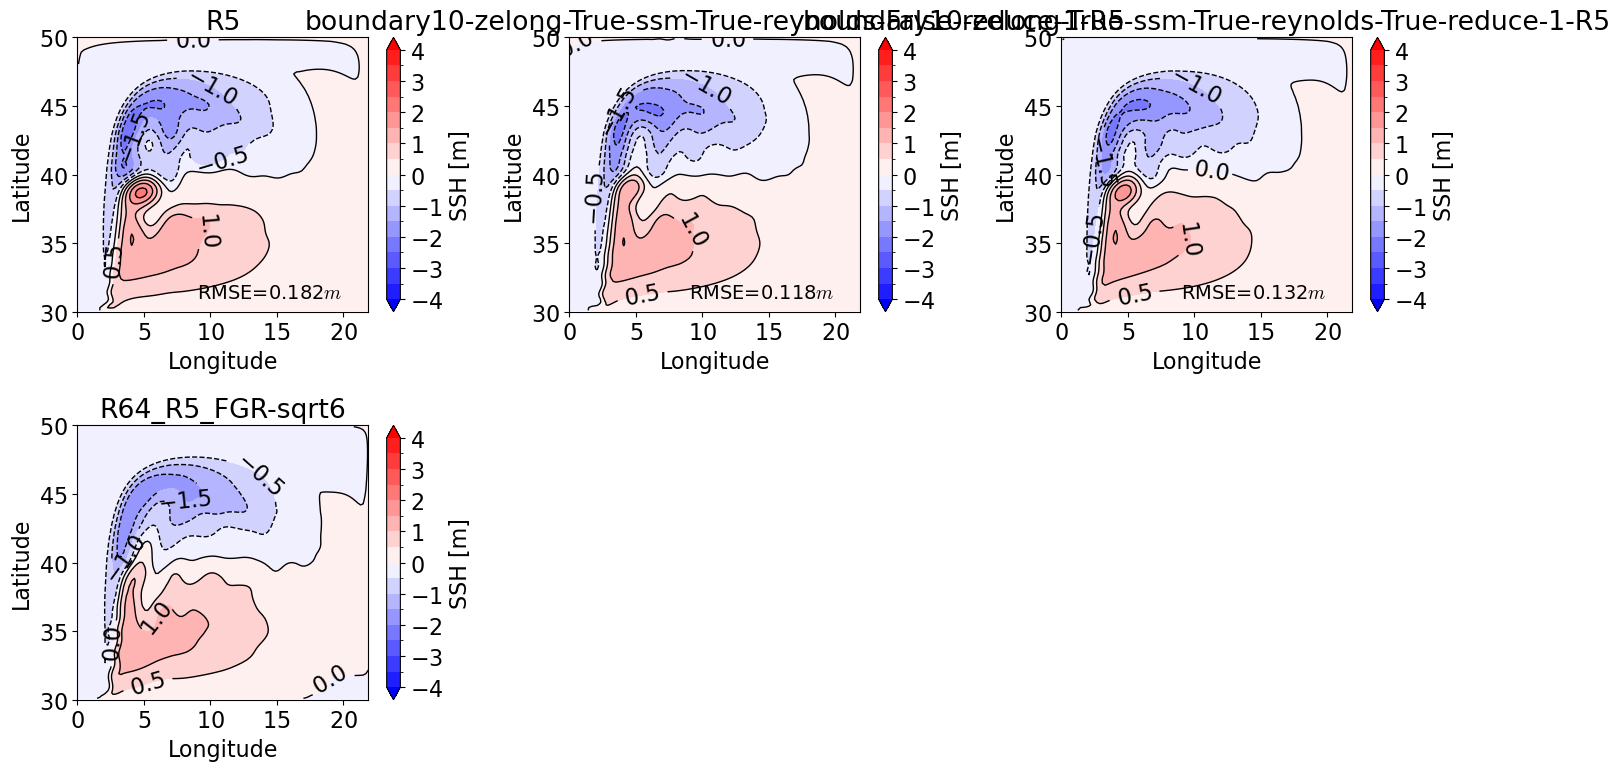

In [178]:
ds.plot_ssh(['R5', 'boundary10-zelong-True-ssm-True-reynolds-False-reduce-1-R5', 'boundary10-zelong-True-ssm-True-reynolds-True-reduce-1-R5', 'R64_R5_FGR-sqrt6'])

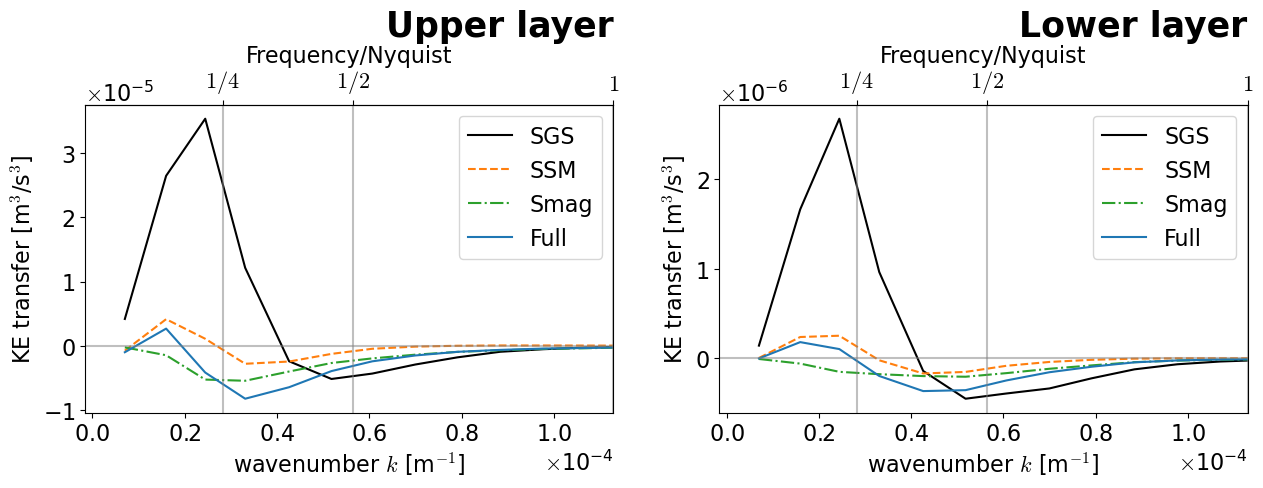

In [205]:
ds.plot_transfer('boundary10-zelong-True-ssm-True-reynolds-False-reduce-1-R4', target='R64_R4_FGR-sqrt6', callback=False)

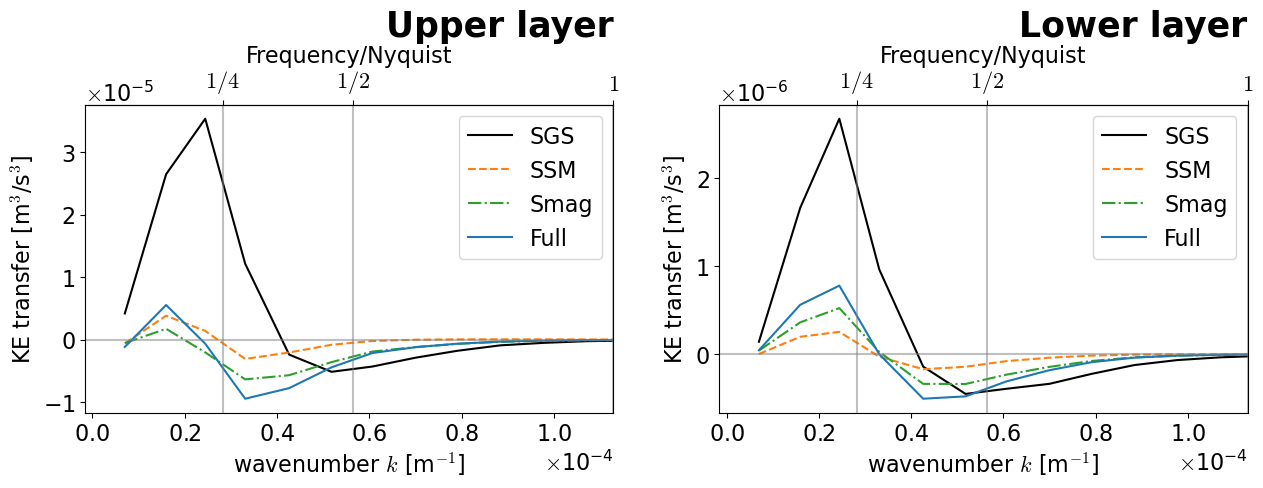

In [204]:
ds.plot_transfer('boundary10-zelong-True-ssm-True-reynolds-True-reduce-1-R4', target='R64_R4_FGR-sqrt6', callback=False)

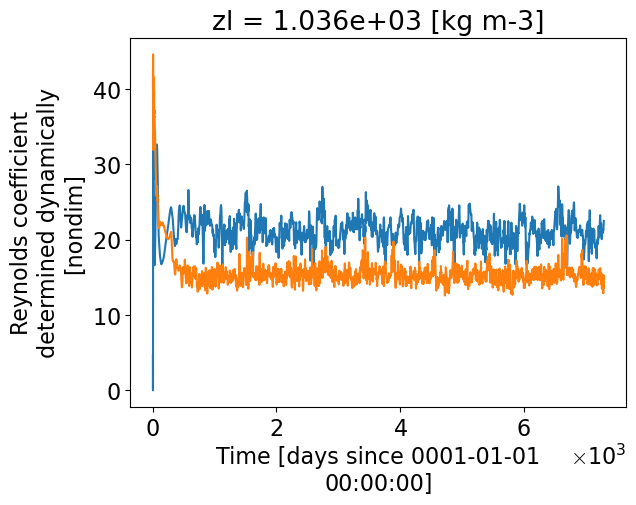

In [229]:
ds['boundary10-zelong-True-ssm-True-reynolds-True-reduce-1-R5'].series_diag.CR_const.isel(zl=0).plot()
ds['boundary10-zelong-True-ssm-True-reynolds-True-reduce-1-R5'].series_diag.CR_const.isel(zl=1).plot()

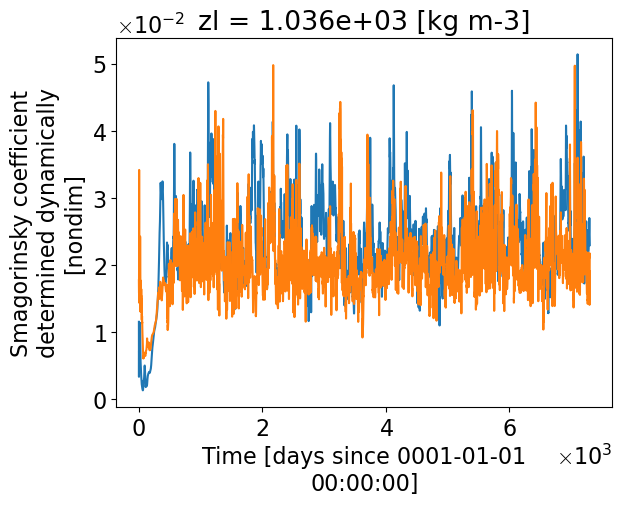

In [225]:
ds['boundary10-zelong-True-ssm-True-reynolds-True-reduce-1-R5'].series_diag.smag_const.isel(zl=0).plot()
ds['boundary10-zelong-True-ssm-True-reynolds-True-reduce-1-R5'].series_diag.smag_const.isel(zl=1).plot()

In [85]:
pg23 = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/NeverWorld2/R2/test/pg23*', decode_times=False)

In [88]:
pg23.u.max(['yh', 'xq']).compute()

<xarray.DataArray 'u' (time: 3, zl: 15)>
array([[1.53633345, 1.53633345, 1.99498833, 2.50407728, 1.34451465,
        1.67158501, 2.04824438, 1.72424764, 1.16645723, 1.27757993,
        1.22754428, 0.9064856 , 0.51324149, 0.51138348, 0.47207305],
       [1.38726338, 1.3837827 , 1.31800297, 1.50707724, 1.73625741,
        1.9791481 , 1.96224555, 1.62334853, 1.33230104, 1.31876462,
        1.30546691, 1.11810007, 0.67709336, 0.65345884, 0.4613722 ],
       [2.29069584, 2.29069584, 2.29069585, 1.95212467, 1.92057336,
        2.06102172, 2.2748155 , 2.00772349, 1.9381834 , 1.91285128,
        1.88467118, 1.495104  , 0.66479881, 0.39478005, 0.37439896]])
Coordinates:
  * zl       (zl) float64 1.023e+03 1.023e+03 1.023e+03 ... 1.028e+03 1.028e+03
  * time     (time) float64 1.3e+04 1.3e+04 1.301e+04

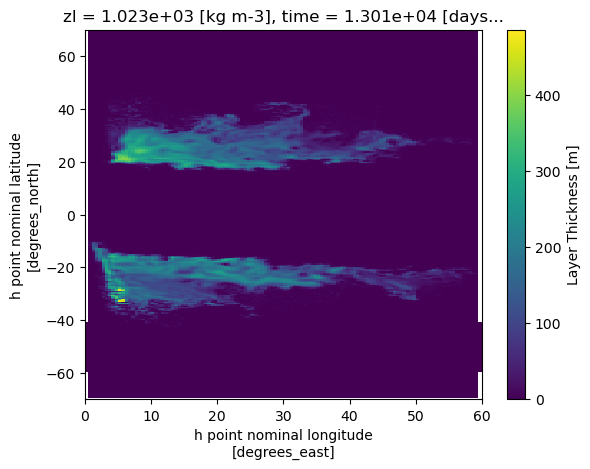

In [94]:
pg23.h.isel(zl=0,time=2).plot()